In [1]:
!pip install request pandas geopy

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [2]:
!pip install requests pandas geopy

In [58]:
import requests
import pandas as pd
from geopy.distance import geodesic

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

print ("Thư viện đã cài thành công !")

Thư viện đã cài thành công !


In [4]:
import os
print (os.getcwd())

C:\Users\Admin


# DATA PREPROCESSING

In [5]:
# Đọc file dữ liệu #

df = pd.read_csv("AirQuality_hcmc.csv")
print(df.columns)
print(df.head())

Index(['date', 'Station_No', 'TSP', 'PM2.5', 'O3', 'CO', 'NO2', 'SO2',
       'Temperature', 'Humidity'],
      dtype='object')
               date  Station_No        TSP      PM2.5         O3           CO  \
0  23-02-2021 21:00           1  32.935714  15.604762  55.431381  1330.451429   
1  23-02-2021 22:00           1  30.932353  14.594118  58.197176  1200.603529   
2  23-02-2021 23:00           1  27.645000  13.436667  55.029433  1177.897000   
3  24-02-2021 00:00           1  24.380000  12.365000  54.767700  1267.476000   
4  24-02-2021 01:00           1  22.521667  11.636667  53.786200  1322.293000   

          NO2         SO2  Temperature   Humidity  
0  112.740762  393.000000    28.361905  63.188095  
1  112.366471  377.588235    28.320588  63.773529  
2  112.700433  372.476667    28.336667  64.205000  
3  112.480867  389.070000    28.305000  64.735000  
4  114.331500  393.000000    28.300000  65.188333  


In [6]:
# Thông tin dữ liệu #

df = pd.read_csv("AirQuality_hcmc.csv")
print("✅ Số dòng dữ liệu:", len(df))
df.head()

✅ Số dòng dữ liệu: 52548


,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
0,23-02-2021 21:00,1,32.935714,15.604762,55.431381,1330.451429,112.740762,393.000000,28.361905,63.188095
1,23-02-2021 22:00,1,30.932353,14.594118,58.197176,1200.603529,112.366471,377.588235,28.320588,63.773529
2,23-02-2021 23:00,1,27.645000,13.436667,55.029433,1177.897000,112.700433,372.476667,28.336667,64.205000
3,24-02-2021 00:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
4,24-02-2021 01:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333


In [7]:
# Kiểm tra tính chất miss data của các cột #

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52548 entries, 0 to 52547
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         52548 non-null  object 
 1   Station_No   52548 non-null  int64  
 2   TSP          52488 non-null  float64
 3   PM2.5        52548 non-null  float64
 4   O3           41938 non-null  float64
 5   CO           43483 non-null  float64
 6   NO2          46882 non-null  float64
 7   SO2          41542 non-null  float64
 8   Temperature  48111 non-null  float64
 9   Humidity     48116 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.0+ MB


In [8]:
# Đếm số lượng dòng thiếu dữ liệu của từng cột #
df.isnull().sum()

date               0
Station_No         0
TSP               60
PM2.5              0
O3             10610
CO              9065
NO2             5666
SO2            11006
Temperature     4437
Humidity        4432
dtype: int64

In [9]:
# Xem dữ liệu có những cột nào #

print(df.columns)  # để xem có các cột nào

Index(['date', 'Station_No', 'TSP', 'PM2.5', 'O3', 'CO', 'NO2', 'SO2',
       'Temperature', 'Humidity'],
      dtype='object')


In [10]:
# Tính ratio dữ liệu bị thiếu, từ đó ra quyết định chọn cách nào để điền dữ liệu bị thiếu #

missing_ratio = df.isnull().mean().sort_values(ascending=False)
print(missing_ratio)

SO2            0.209447
O3             0.201911
CO             0.172509
NO2            0.107825
Temperature    0.084437
Humidity       0.084342
TSP            0.001142
date           0.000000
Station_No     0.000000
PM2.5          0.000000
dtype: float64


In [11]:
# Điền dữ liệu bị thiếu bằng nội suy tuyến tính #

df[['SO2', 'O3', 'CO', 'NO2']] = df.groupby('Station_No')[['SO2', 'O3', 'CO', 'NO2']].transform(lambda x: x.interpolate(method='linear'))

In [12]:
# Điền dữ liệu bị thiếu bằng nội suy tuyến tính #

df[['Temperature', 'Humidity']] = df.groupby('Station_No')[['Temperature', 'Humidity']].transform(lambda x: x.interpolate())

In [13]:
# Tính độ lệch chuẩn: Là một thước đo độ phân tán của dữ liệu quanh giá trị trung bình (mean) #
# Giá trị càng lớn, dữ liệu càng rải rác và biến động mạnh.
# Giá trị càng nhỏ, dữ liệu càng tập trung gần trung bình.

df[['TSP', 'PM2.5', 'SO2', 'O3']].std()

TSP       35.513882
PM2.5     14.229703
SO2      175.992818
O3        47.968006
dtype: float64

In [15]:
# Điền dữ liệu bị thiếu bằng mean 

df['TSP'] = df.groupby('Station_No')['TSP'].transform(lambda x: x.fillna(x.mean()))

In [16]:
# Kiểm tra lại thông tin của các cột có bị thiếu ko

print(df.isnull().sum())

date           0
Station_No     0
TSP            0
PM2.5          0
O3             0
CO             0
NO2            0
SO2            0
Temperature    0
Humidity       0
dtype: int64


# EDA - EXPLORATORY DATA ANALYSIS

## Descriptive Statistics

In [17]:
# Cấu trúc và thông tin dữ liệu
    
print(df.shape)         # Số dòng và cột
print(df.columns)       # Tên các cột
print(df.dtypes)        # Kiểu dữ liệu từng cột
print(df.head())        # Xem 5 dòng đầu tiên

(52548, 10)
Index(['date', 'Station_No', 'TSP', 'PM2.5', 'O3', 'CO', 'NO2', 'SO2',
       'Temperature', 'Humidity'],
      dtype='object')
date            object
Station_No       int64
TSP            float64
PM2.5          float64
O3             float64
CO             float64
NO2            float64
SO2            float64
Temperature    float64
Humidity       float64
dtype: object
               date  Station_No        TSP      PM2.5         O3           CO  \
0  23-02-2021 21:00           1  32.935714  15.604762  55.431381  1330.451429   
1  23-02-2021 22:00           1  30.932353  14.594118  58.197176  1200.603529   
2  23-02-2021 23:00           1  27.645000  13.436667  55.029433  1177.897000   
3  24-02-2021 00:00           1  24.380000  12.365000  54.767700  1267.476000   
4  24-02-2021 01:00           1  22.521667  11.636667  53.786200  1322.293000   

          NO2         SO2  Temperature   Humidity  
0  112.740762  393.000000    28.361905  63.188095  
1  112.366471  377.588235

In [18]:
# Thống kê mô tả #

df.describe()

,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
count,52548.000000,52548.000000,52548.000000,52548.000000,52548.000000,52548.000000,52548.000000,52548.000000,52548.000000
mean,3.536062,43.567366,21.126031,88.898669,1129.644884,86.047075,248.366147,28.033175,63.560952
std,1.695122,35.497160,14.229703,47.968006,634.738212,73.922496,175.992818,4.208485,24.703114
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000,18.491667,11.320000
25%,2.000000,24.666667,12.520000,64.615417,716.059000,38.047767,131.000000,26.105000,57.880000
50%,4.000000,38.798333,17.475000,89.545517,877.072000,73.837133,197.373333,28.446667,68.245000
75%,5.000000,57.200417,25.636667,120.135600,1683.378500,105.925233,330.556667,30.941667,81.455546
max,6.000000,938.198333,403.688333,377.288600,21092.570770,461.090000,699.976667,42.808333,99.283333


### Diễn giải nổi bật:
- TSP và PM2.5 có trung bình thấp (43.6 và 21.1), nhưng cực đại rất cao (938 và 403) → xuất hiện một số thời điểm bụi đột biến, có thể là các ngày ô nhiễm nghiêm trọng.
- CO và NO₂ có giá trị trung bình và độ lệch chuẩn cao → phân bố rộng, phản ánh ảnh hưởng từ phương tiện giao thông hoặc công nghiệp.
- SO₂ và O₃ ở mức trung bình nhưng cũng có thời điểm cao bất thường (max ~699 SO₂).
- Nhiệt độ và độ ẩm phân bố hợp lý, không có giá trị ngoại lai đáng kể. Trung bình khoảng 28°C và 64% → phù hợp khí hậu TP.HCM.
- Station_No từ 1 đến 6, phân bố trung bình quanh 3.5 → cho thấy dữ liệu từ nhiều trạm quan trắc.

## Distribution Plot

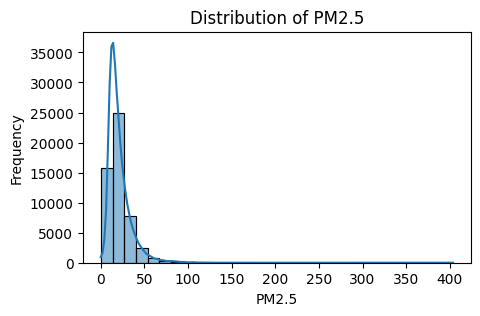

In [19]:
# Biểu đồ phân phối (Distribution Plot) #
# Vẽ histogram cho cột PM2.5 #

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PM2.5']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
# KDE là đường mượt hóa biểu diễn xác suất xuất hiện của các giá trị, không dựa vào từng bin như histogram.

<Axes: xlabel='PM2.5'>

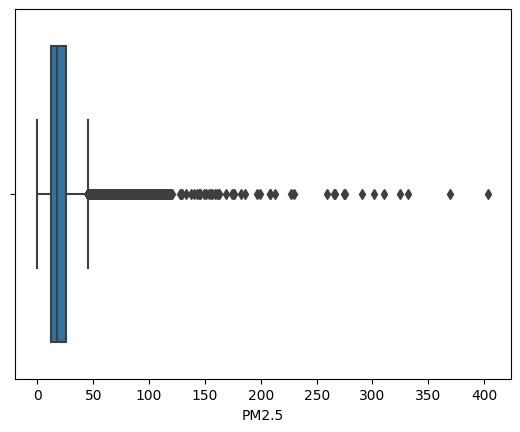

In [20]:
sns.boxplot(x=df['PM2.5'])

### 📊 Phân phối PM2.5

- **Phân phối:** Lệch phải rõ rệt  
- **Khoảng phổ biến:** 10–40 µg/m³  
- **Outlier:** Một số giá trị vượt 50 µg/m³  
- **Nhận xét:**
  - Dữ liệu không phân phối chuẩn → cần xử lý nếu đưa vào mô hình
  - Có thể xem xét chia theo ngưỡng AQI để phân tích sâu hơn

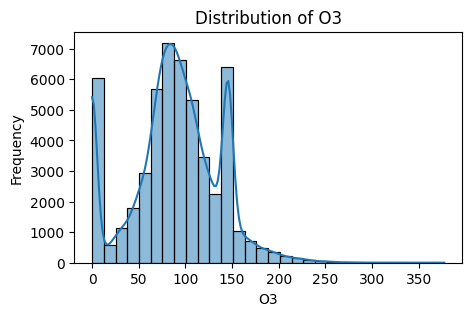

In [21]:
# Vẽ histogram cho cột 03 #

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['O3']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='O3'>

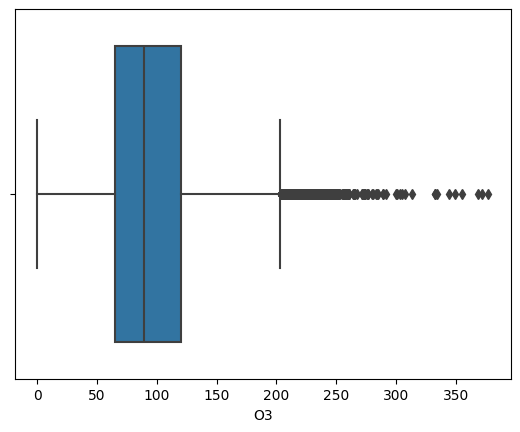

In [22]:
sns.boxplot(x=df['O3'])

### 📊 Phân phối O3 (Ozone)

- **Dạng phân phối:** Lệch phải nhẹ, có hai đỉnh (bi-modal)
- **Khoảng phổ biến:** Từ 50 đến 130 µg/m³
- **Outlier:** Có một số giá trị vượt 170 µg/m³
- **Đặc điểm nổi bật:**
  - Đỉnh đầu tiên nhỏ, quanh mức ~10 µg/m³ → có thể là giá trị ban đêm hoặc thời điểm ít ô nhiễm
  - Đỉnh chính lớn hơn ở khoảng 90 µg/m³ → phổ biến hơn, có thể là vào ban ngày
- **Nhận xét:**
  - Phân phối không chuẩn, có thể cần chuẩn hóa (normalization) hoặc biến đổi (log, box-cox) nếu dùng thuật toán ML
  - Nên phân tích theo thời gian để xác định lý do có 2 đỉnh

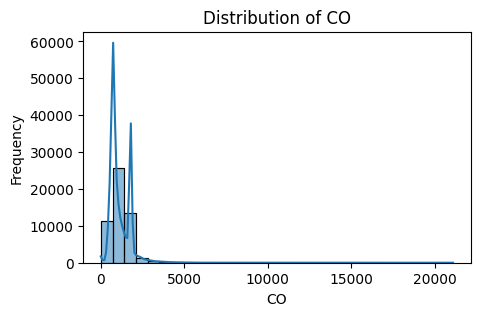

In [23]:
# Vẽ histogram cho cột CO #

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['CO']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='CO'>

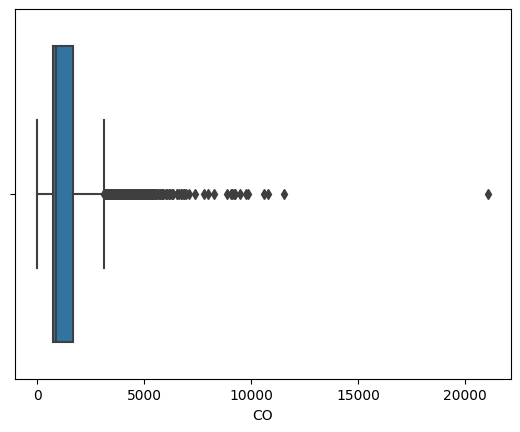

In [24]:
sns.boxplot(x=df['CO'])

### 📊 Phân phối CO

- **Dạng phân phối:** Lệch phải mạnh (right-skewed), phân phối dài đuôi
- **Khoảng phổ biến:** Tập trung chủ yếu từ 0 đến khoảng 3000 µg/m³
- **Outlier:** Nhiều giá trị lớn vượt quá 3000 và kéo dài tới hơn 20.000 µg/m³
- **Đặc điểm nổi bật:**
  - Phân phối có một đỉnh rõ ràng trong khoảng 1000–2000 µg/m³
  - Có một số cụm giá trị bất thường nằm ở vùng giá trị rất cao (outlier), có thể là do sự cố cảm biến hoặc lỗi đo lường hay sự kiện đột biến như cháy, kẹt xe nghiêm trọng, ô nhiễm công nghiệp đột ngột 
- **Nhận xét:**
  - Dữ liệu không phân phối chuẩn, có đuôi dài → có thể ảnh hưởng đến các mô hình hồi quy hoặc học máy
  - Nên phân tích theo thời gian hoặc theo trạm đo để xác định nguyên nhân cụ thể của các giá trị cực đoan này

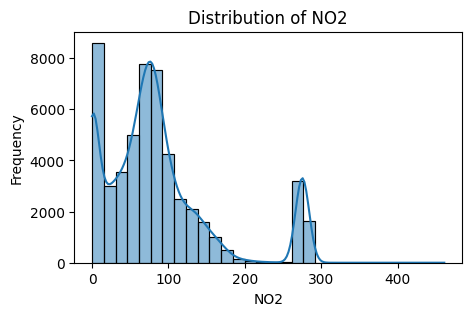

In [25]:
# Vẽ histogram cho cột NO2 #

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['NO2']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='NO2'>

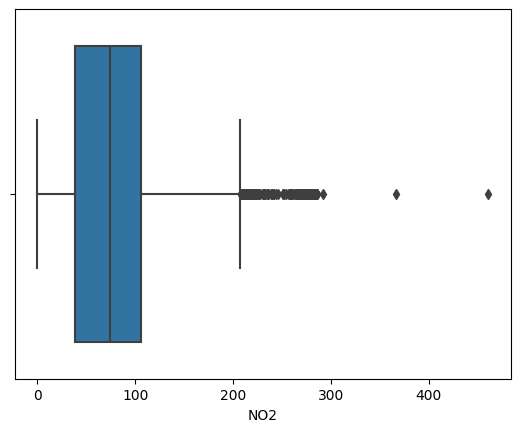

In [26]:
sns.boxplot(x=df['NO2'])

### 📊 Phân phối NO₂ (Nitrogen Dioxide)

- **Dạng phân phối:** Lệch phải (right-skewed), phân phối nhiều đỉnh (multi-modal)
- **Khoảng phổ biến:** Phần lớn dữ liệu nằm trong khoảng từ 0 đến 150 µg/m³
- **Outlier:** Có hai cụm giá trị cao bất thường ở khoảng ~260 µg/m³ và ~280 µg/m³
- **Đặc điểm nổi bật:**
  - Có một đỉnh lớn ở khoảng 80–100 µg/m³ → đây là khoảng giá trị phổ biến nhất
  - Hai cụm nhỏ ở vùng giá trị cao có thể là do các trạm đo gần nguồn phát thải (khu công nghiệp, đường lớn) hay lỗi thiết bị hoặc đột biến khí hậu – môi trường tại thời điểm đó
- **Nhận xét:**
  - Phân phối không chuẩn và xuất hiện nhiều đỉnh → cần xem xét tách dữ liệu theo trạm đo hoặc thời gian
  - Nên kiểm tra các giá trị cực cao để đảm bảo chất lượng dữ liệu
  - Có thể cần chuẩn hóa hoặc biến đổi log nếu áp dụng cho các mô hình học máy

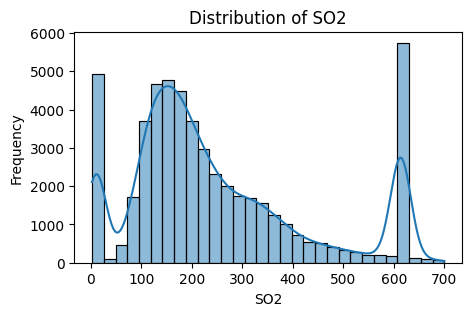

In [27]:
# Vẽ histogram cho cột SO2 #

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['SO2']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='SO2'>

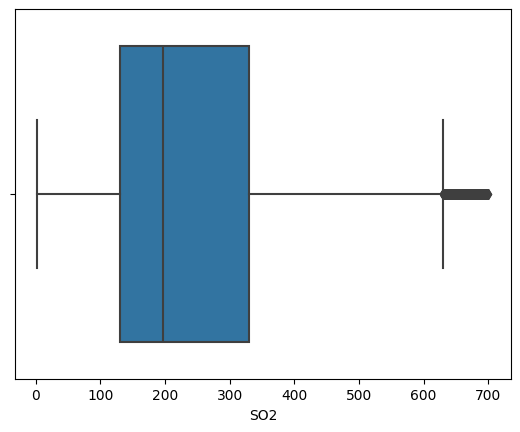

In [28]:
sns.boxplot(x=df['SO2'])

### 📊 Phân phối SO₂ (Sulfur Dioxide)

- **Dạng phân phối:** Lệch phải (right-skewed), có nhiều đỉnh (multi-modal)
- **Khoảng phổ biến:** Chủ yếu tập trung trong khoảng 100–300 µg/m³
- **Outlier:** Có một cụm giá trị rất cao gần 580–700 µg/m³
- **Đặc điểm nổi bật:**
  - Đỉnh lớn nhất ở khoảng 230 µg/m³ → cho thấy mức SO₂ thường xuyên cao tại nhiều thời điểm/trạm đo
  - Cụm giá trị cao bất thường có thể là do gần khu vực công nghiệp, nhà máy nhiệt điện hoặc giao thông dày đặc hay thiết bị đo lỗi hoặc sự kiện môi trường cực đoan (cháy rừng, sự cố khí thải)
- **Nhận xét:**
  - Phân phối không chuẩn → nếu phân tích thống kê hoặc học máy, có thể cần biến đổi log hoặc loại bỏ outlier
  - Nên phân tích theo vị trí trạm đo hoặc thời gian để hiểu rõ nguyên nhân của các đỉnh bất thường

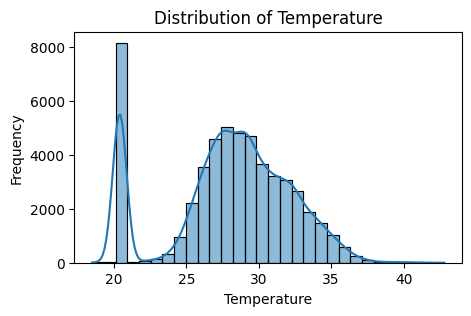

In [29]:
# Vẽ histogram cho cột Temperature

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Temperature']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Temperature'>

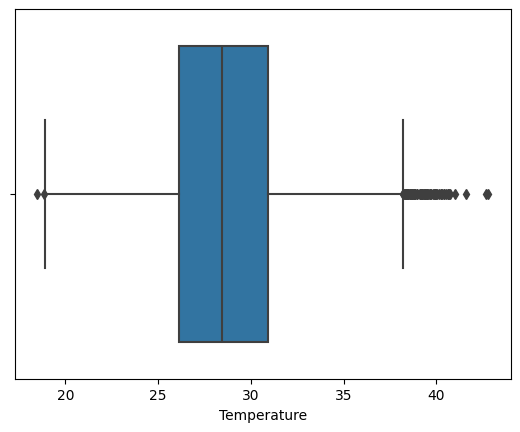

In [30]:
sns.boxplot(x=df['Temperature'])

### 🌡️ Phân phối Nhiệt độ (Temperature)

- **Dạng phân phối:** Gần giống chuẩn, nhưng có thêm một đỉnh nhỏ → bimodal nhẹ
- **Khoảng phổ biến:** Từ 25°C đến 35°C, đỉnh chính ở khoảng 28–30°C
- **Outlier:** Có cụm giá trị nhỏ tập trung ở ~20°C và ~38°C → khác biệt rõ so với phần còn lại
- **Đặc điểm nổi bật:**
  - Đỉnh nhỏ tại 20°C và 38°C có thể do ghi nhận vào ban đêm hoặc mùa mưa hay lỗi thiết bị khi ghi nhận một khoảng giá trị không khớp với xu hướng chung
  - Phân phối khá hợp lý, có thể sử dụng trực tiếp cho phân tích thống kê hoặc mô hình
- **Nhận xét:**
  - Nên kiểm tra kỹ theo thời gian (giờ, ngày, tháng) để xác minh đỉnh 20°C
  - Nếu cần chuẩn hóa, có thể dùng StandardScaler (vì dữ liệu gần chuẩn)

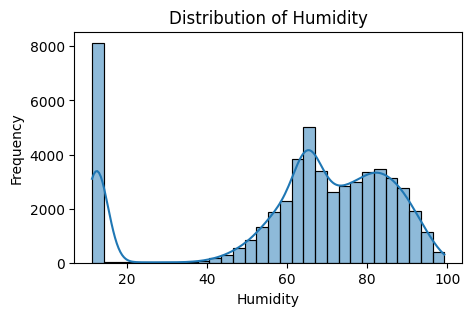

In [31]:
# Vẽ histogram cho cột Humidity

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Humidity']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Humidity'>

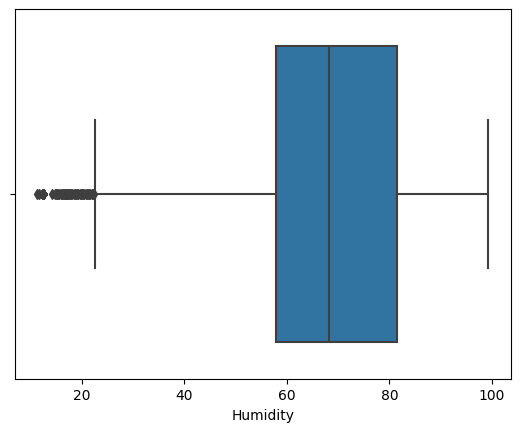

In [32]:
sns.boxplot(x=df['Humidity'])

### 💧 Phân phối Humidity (Độ ẩm)

- **Dạng phân phối:** Bi-modal (2 đỉnh), lệch trái nhẹ
- **Khoảng phổ biến:** Từ 55% đến 95%
- **Outlier:** Có cụm giá trị bất thường cao ở mức ~15%, tách biệt hoàn toàn với phần còn lại
- **Đặc điểm nổi bật:**
  - Đỉnh đầu tiên nhỏ (~15%) → có thể do lỗi thiết bị hoặc ghi nhận sai giá trị thấp
  - Đỉnh chính phân bố khá đều từ 60% đến 90%, phù hợp với khí hậu nóng ẩm tại TP.HCM
- **Nhận xét:**
  - Cần kiểm tra nguồn dữ liệu ~15% xem có bất thường hay không (thiết bị, thời gian ghi nhận, v.v.)
  - Nếu dùng trong mô hình ML, nên cân nhắc loại bỏ hoặc xử lý lại cụm giá trị thấp
  - Có thể chuẩn hóa (StandardScaler) để đưa về cùng thang đo khi phân tích kết hợp với các biến khác

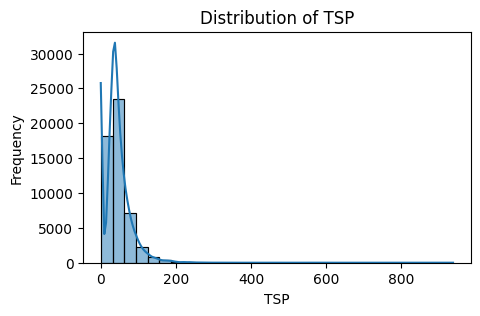

In [33]:
# Vẽ histogram cho cột TSP

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['TSP']
for col in cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='TSP'>

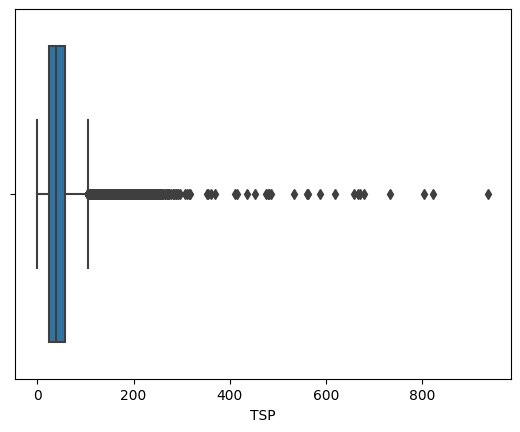

In [34]:
sns.boxplot(x=df['TSP'])

### 🟤 Phân phối TSP (Total Suspended Particles)

- **Dạng phân phối:** Lệch phải mạnh (right-skewed), không chuẩn
- **Khoảng phổ biến:** Chủ yếu tập trung dưới 200 µg/m³
- **Outlier:** Một số giá trị vượt quá 120 µg/m³, thậm chí có thể lên đến 700–800 µg/m³
- **Đặc điểm nổi bật:**
  - Phần lớn dữ liệu nằm trong vùng thấp → mức độ bụi thông thường
  - Một vài giá trị cao bất thường có thể đến từ các đợt ô nhiễm đột biến hoặc lỗi ghi nhận
- **Nhận xét:**
  - Dữ liệu không phân phối chuẩn → cần chuẩn hóa hoặc biến đổi nếu dùng cho mô hình học máy
  - Nên phân tích thêm theo thời gian (ngày, tháng, mùa) để xem các đợt tăng đột biến này xảy ra khi nào và vì sao

### Bảng tóm tắt Markdown cho tất cả các biểu đồ phân phối 

| **Biến số**     | **Dạng phân phối**    | **Khoảng phổ biến** | **Outlier**                           | **Ghi chú nổi bật** | 
| --------------- | --------------------- | ------------------- | ------------------------------------- | --------------------|

| **PM2.5**       | Lệch phải mạnh        | Dưới 50 µg/m³       | Có giá trị vượt 50 µg/m³             | Phân phối không      chuẩn, cần xử lý trước khi phân tích    |

| **O3**          | Lệch phải nhẹ, 2 đỉnh | 50 – 130 µg/m³      | Vượt 170 µg/m³                        | Có thể phản ánh sự chênh lệch giữa ngày và đêm          |

| **CO**          | Lệch phải rất mạnh    | Dưới 3000 µg/m³     | Vượt 3.000–20.000 µg/m³              | Có khả năng nhiễu/lỗi thiết bị hoặc sự kiện ô nhiễm lớn |

| **NO2**         | Lệch phải, 3 đỉnh rõ  | 50 – 120 µg/m³      | Nhóm đỉnh thứ 2, 3 tại \~260 và \~280 | Cần phân tích theo nguồn/nơi đo để hiểu rõ hơn          |

| **SO2**         | Lệch phải, 3 đỉnh rõ  | 100 – 250 µg/m³     | Đỉnh phụ ở \~600 µg/m³                | Có thể do lỗi đo hoặc hoạt động công nghiệp             |

| **TSP**         | Lệch phải mạnh        | Dưới 200 µg/m³      | Vượt 300–800 µg/m³                    | Có đợt tăng đột biến hoặc sai số thiết bị               |

| **Temperature** | Lệch phải nhẹ, 2 đỉnh | 25 – 35 °C          | Bất thường tại ~20°C  và ~28°C     | Có thể do lỗi ghi nhận hoặc nhiệt độ thấp bất thường    |

| **Humidity**    | 2 đỉnh (bi-modal)     | 60 – 90 %           | Đỉnh phụ bất thường ở \~15%           | Khả năng lỗi cảm biến hoặc dữ liệu ngoài vùng đo được   |


## Correlation

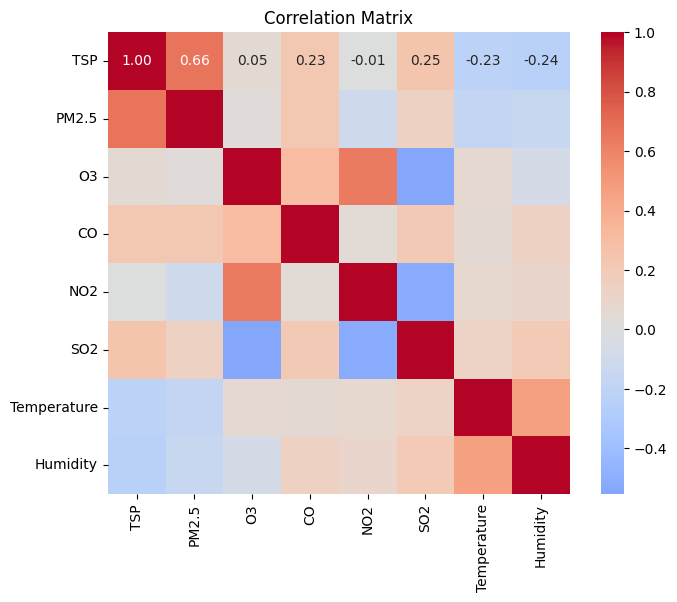

In [98]:
plt.figure(figsize=(8, 6))
corr = df[['TSP', 'PM2.5', 'O3', 'CO', 'NO2', 'SO2', 'Temperature', 'Humidity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True,
            annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

### 🧮 Hệ số tương quan Pearson giữa các biến:

| Biến         | TSP   | PM2.5 | O₃    | CO   | NO₂   | SO₂   | Temp  | Humidity |
| ------------ | ----- | ----- | ----- | ---- | ----- | ----- | ----- | -------- |
| **TSP**      | 1.00  | 0.66  | 0.05  | 0.23 | -0.01 | 0.25  | -0.23 | -0.24    |
| **PM2.5**    | 0.66  | 1.00  | 0.23  | 0.23 | -0.01 | 0.25  | -0.23 | -0.24    |
| **O₃**       | 0.05  | 0.23  | 1.00  | 0.40 | 0.49  | -0.23 | 0.13  | 0.07     |
| **CO**       | 0.23  | 0.23  | 0.40  | 1.00 | 0.24  | 0.18  | 0.07  | 0.21     |
| **NO₂**      | -0.01 | -0.01 | 0.49  | 0.24 | 1.00  | -0.42 | 0.08  | 0.10     |
| **SO₂**      | 0.25  | 0.25  | -0.23 | 0.18 | -0.42 | 1.00  | -0.39 | -0.28    |
| **Temp**     | -0.23 | -0.23 | 0.13  | 0.07 | 0.08  | -0.39 | 1.00  | 0.40     |
| **Humidity** | -0.24 | -0.24 | 0.07  | 0.21 | 0.10  | -0.28 | 0.40  | 1.00     |


- PM2.5 và TSP có tương quan mạnh (0.66) → Khi bụi tổng (TSP) tăng thì bụi mịn PM2.5 cũng tăng, phản ánh mức ô nhiễm bụi chung gia tăng.
- Temperature (nhiệt độ) có tương quan âm với PM2.5 và SO₂ → Vào lúc nhiệt độ cao, nồng độ bụi mịn và SO₂ có xu hướng giảm, có thể do khí khuếch tán tốt hơn hoặc do ảnh hưởng của ánh nắng đến phản ứng hóa học trong khí quyển.
- Humidity (độ ẩm) tương quan âm với bụi (TSP, PM2.5) → Không khí ẩm khiến bụi dễ rơi xuống mặt đất, giúp giảm nồng độ bụi trong không khí.
- O₃ và NO₂ có tương quan khá mạnh (0.49) → Gợi ý rằng NO₂ là tiền chất trong quá trình hình thành O₃ dưới tác động ánh nắng (phản ứng quang hóa).
- CO – O₃/NO₂ có tương quan dương nhẹ → Có thể do cùng phát sinh từ khí thải.
- Temperature – Humidity có tương quan dương nhẹ (0.40) → Nhiệt độ và độ ẩm có xu hướng cùng tăng, tùy theo mùa.

## Time Trend Analysis

In [36]:
# Tạo các cột thời gian mới để phân tích
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y %H:%M')
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.dayofweek  # 0: Monday, 6: Sunday
df['week'] = df['date'].dt.isocalendar().week
df['hour'] = df['date'].dt.hour

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'   # Mùa Đông
    elif month in [3, 4, 5]:
        return 'Spring'   # Mùa Xuân
    elif month in [6, 7, 8]:
        return 'Summer'   # Mùa Hè
    else:
        return 'Autumn'   # Mùa Thu

df['season'] = df['month'].apply(get_season)

### PM2.5

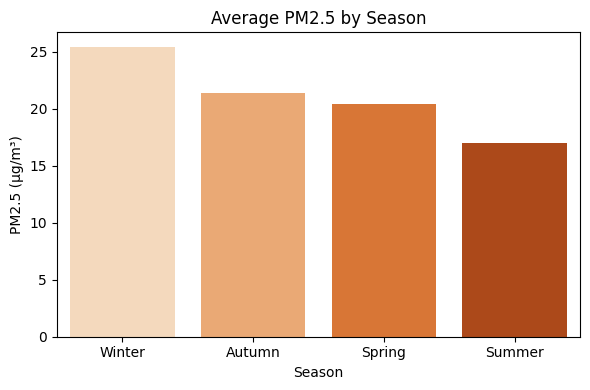

In [41]:
# Theo mùa (gộp 2 năm)
pm25_by_season = df.groupby('season')['PM2.5'].mean().reset_index()
pm25_by_season = pm25_by_season.sort_values(by='PM2.5', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
sns.barplot(data=pm25_by_season, x='season', y='PM2.5', palette='Oranges')
plt.title('Average PM2.5 by Season')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

#### 📈 PM2.5 theo mùa (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: barplot
- **Trục X**: 4 mùa (Winter, Autumn, Spring, Summer)
- **Trục Y**: Trung bình PM2.5 (µg/m³)
- **Mục tiêu**: 
    . Phân tích xu hướng ô nhiễm bụi mịn PM2.5 theo mùa.
| Mùa              | PM2.5 trung bình (µg/m³) |
| ---------------- | ------------------------ |
| ❄️ Winter (Đông) | **25.45**                |
| 🍂 Autumn (Thu)  | **21.38**                |
| 🌸 Spring (Xuân) | **20.40**                |
| ☀️ Summer (Hè)   | **16.99**                |

- **Nhận xét**: 
    - PM2.5 cao nhất vào mùa Đông (25.45 µg/m³), thấp nhất vào mùa Hè (16.99 µg/m³)
    - Có sự chênh lệch đáng kể giữa các mùa, trung bình mùa Đông cao hơn mùa Hè đến gần 50%
    - Mức ô nhiễm có xu hướng tăng vào mùa khô (Đông) và giảm vào mùa mưa (Hè).
- **Giải thích**:
    - Mùa Đông thường ít mưa, không khí hanh khô, ít gió, dẫn đến việc các hạt bụi mịn PM2.5 tích tụ nhiều hơn trong không khí
    - Mùa Hè có mưa nhiều, gió mạnh hơn → giúp khuếch tán và làm sạch không khí
    - Một phần ô nhiễm có thể đến từ sưởi ấm, đốt rác, hoặc khí thải nhiều hơn vào mùa lạnh.

             PM2.5  Humidity
PM2.5     1.000000 -0.152045
Humidity -0.152045  1.000000


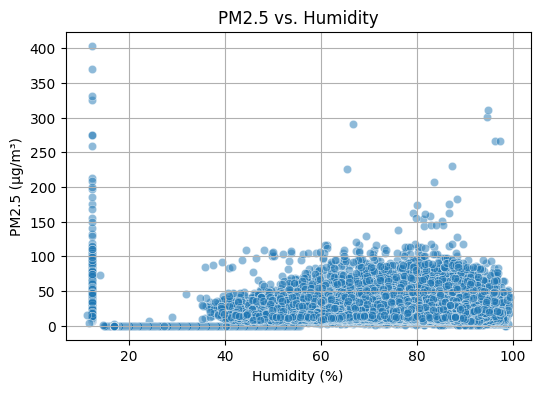

In [74]:
# Kiểm tra tương quan giữa PM2.5 và Humidity
correlation = df[['PM2.5', 'Humidity']].corr()
print(correlation)

# Vẽ biểu đồ scatter để trực quan hóa
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Humidity', y='PM2.5', alpha=0.5)
plt.title('PM2.5 vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

#### 🔗 Mối tương quan giữa PM2.5 và Độ ẩm (Humidity)

- **Dạng biểu đồ**: Scatterplot
- **Trục X**: Humidity (%)
- **Trục Y**: PM2.5 (µg/m³)
- **Mục tiêu**: 
    . Kiểm tra độ tương quan giữa PM2.5 và Humidity 
- **Nhận xét**: 
    - Hệ số tương quan: -0.152 (Pearson correlation)
    - Mức độ tương quan: Yếu
    - Chiều hướng: Tương quan âm → Khi độ ẩm tăng, PM2.5 có xu hướng giảm nhẹ
- **Giải thích**:
    - Độ ẩm cao có thể giúp bụi mịn kết tụ và lắng xuống → làm giảm nồng độ PM2.5 trong không khí.
    - Tuy nhiên, hệ số nhỏ (-0.15) cho thấy mối quan hệ không mạnh và có thể bị ảnh hưởng bởi các yếu tố khác như gió, nhiệt độ, thời tiết.

                PM2.5  Temperature
PM2.5        1.000000    -0.175384
Temperature -0.175384     1.000000


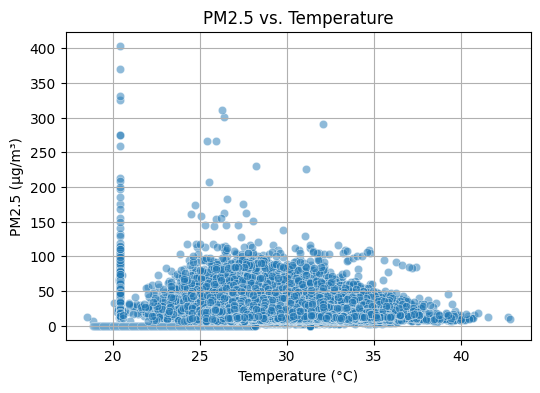

In [75]:
# Kiểm tra tương quan giữa PM2.5 và Temperature
correlation = df[['PM2.5', 'Temperature']].corr()
print(correlation)

# Vẽ biểu đồ scatter để trực quan hóa
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Temperature', y='PM2.5', alpha=0.5)
plt.title('PM2.5 vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

#### 🔗 Mối tương quan giữa PM2.5 và Nhiệt độ (Temperature)

- **Dạng biểu đồ**: Scatterplot
- **Trục X**: Temperature (°C)
- **Trục Y**: PM2.5 (µg/m³)
- **Mục tiêu**: Kiểm tra độ tương quan giữa PM2.5 và Temperature
- **Nhận xét**: 
    - Hệ số tương quan: -0.175 (Pearson correlation)
    - Mức độ tương quan: Yếu
    - Chiều hướng: Tương quan âm → Khi nhiệt độ tăng, nồng độ PM2.5 có xu hướng giảm nhẹ
- **Giải thích**:
    - Nhiệt độ cao thường đi kèm với gió mạnh, bức xạ mặt trời cao → giúp phát tán bụi mịn trong không khí
    - Ngược lại, nhiệt độ thấp có thể đi kèm với hiện tượng nghịch nhiệt (inversion), khiến bụi bị giữ lại gần mặt đất.

### O3 (Ozone)

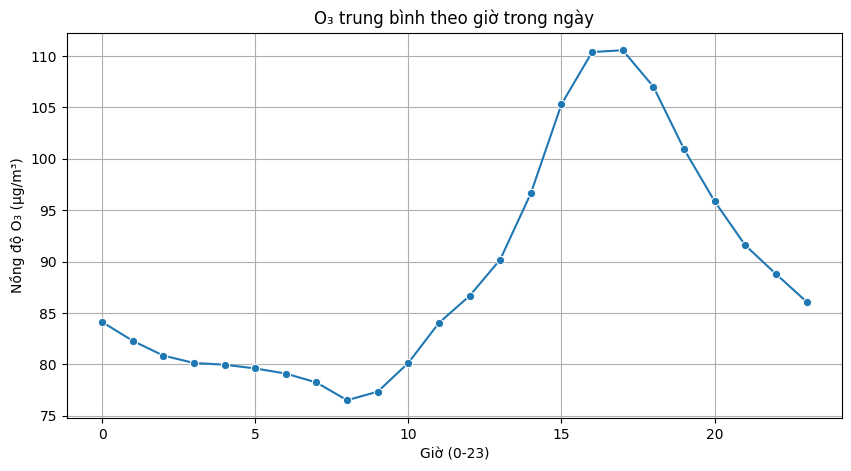

In [50]:
# Theo giờ trong ngày (của cả 2 năm)
o3_by_hour = df.groupby('hour')['O3'].mean().reset_index()
o3_by_hour = o3_by_hour.sort_values(by='O3', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))
sns.lineplot(data=o3_by_hour, x='hour', y='O3', marker='o')
plt.title('O₃ trung bình theo giờ trong ngày')
plt.xlabel('Giờ (0-23)')
plt.ylabel('Nồng độ O₃ (µg/m³)')
plt.grid(True)
plt.show()

In [51]:
print(o3_by_hour)

    hour          O3
17    17  110.559631
16    16  110.379480
18    18  107.013357
15    15  105.309797
19    19  100.941731
14    14   96.643926
20    20   95.859862
21    21   91.586984
13    13   90.205291
22    22   88.797068
12    12   86.669169
23    23   86.103014
0      0   84.135773
11    11   84.047404
1      1   82.303725
2      2   80.865306
10    10   80.149539
3      3   80.144615
4      4   79.976369
5      5   79.613505
6      6   79.115598
7      7   78.248371
9      9   77.351489
8      8   76.521931


#### 📈 O3 theo giờ trong ngày (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: lineplot
- **Trục X**: 24 giờ
- **Trục Y**: Nồng độ trung bình O3 (µg/m³)
- **Mục tiêu**: Phân tích xu hướng ô nhiễm O3 theo giờ trong ngày.
- **Nhận xét**: 
    - Khoảng giá trị: Từ ~76 µg/m³ (giờ thấp nhất) đến ~111 µg/m³ (giờ cao nhất)
    - Giờ cao nhất: 17h (110.56 µg/m³), 16h (110.38 µg/m³), 18h (107.01 µg/m³)
    - Giờ thấp nhất: 8h – 9h sáng (~76–77 µg/m³)
- **Xu hướng**:
    - Tăng dần từ sáng đến chiều: O₃ bắt đầu tăng nhẹ từ 6h sáng và đạt đỉnh vào khoảng 16h–17h.
    - Giảm dần sau 18h: Sau khi mặt trời yếu dần, nồng độ O₃ bắt đầu giảm mạnh về đêm.
- **Giải thích**:
    - O₃ hình thành mạnh nhất khi có ánh sáng mặt trời → quang hóa từ NO₂ dưới tác động UV.
    - Vì vậy, nồng độ O₃ cao nhất vào buổi chiều (khoảng 15h–18h), khi ánh nắng mạnh nhất.
    - Buổi tối & sáng sớm, ánh nắng yếu nên O₃ giảm mạnh.

                   O3  Temperature
O3           1.000000     0.069658
Temperature  0.069658     1.000000


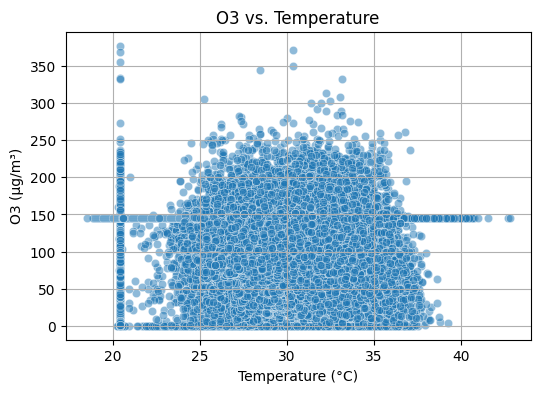

In [76]:
# Kiểm tra tương quan giữa O3 và Temperature
correlation = df[['O3', 'Temperature']].corr()
print(correlation)

# Vẽ biểu đồ scatter để trực quan hóa
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Temperature', y='O3', alpha=0.5)
plt.title('O3 vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)
plt.show()

#### 🔗 Mối tương quan giữa O3 và Nhiệt độ (Temperature)

- **Dạng biểu đồ**: Scatterplot
- **Trục X**: Temperature (°C)
- **Trục Y**: O3 (µg/m³)
- **Mục tiêu**: Kiểm tra độ tương quan giữa O3 và Temperature
- **Nhận xét**: 
    - Hệ số tương quan Pearson ~ 0.07 → mối tương quan rất yếu giữa nhiệt độ và nồng độ O₃.
    - Nghĩa là: nhiệt độ tăng thì O₃ có xu hướng tăng nhẹ, nhưng không rõ ràng.
- **Giải thích**:
    - O₃ thường hình thành do phản ứng quang hóa, nên ảnh hưởng bởi ánh sáng mặt trời hơn là nhiệt độ trực tiếp.
    - Trong môi trường đô thị, các yếu tố như lưu lượng giao thông, NOx, VOCs và mức UV ảnh hưởng đến O₃ nhiều hơn nhiệt độ đơn thuần.

### SO₂ (Sulfur Dioxide)

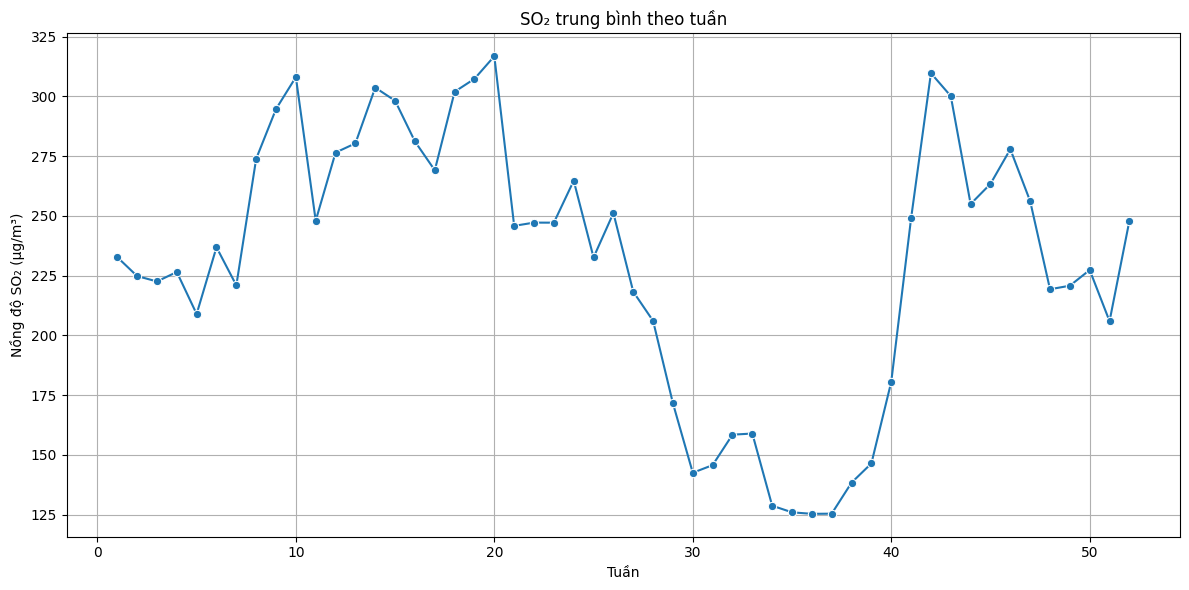

In [65]:
# Theo tuần trong năm (của cả 2 năm)
so2_by_week = df.groupby(['week'])['SO2'].mean().reset_index()
so2_by_week = so2_by_week.sort_values(by='SO2', ascending=False)

# Ép kiểu
so2_by_week['week'] = so2_by_week['week'].astype(int)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=so2_by_week, x='week', y='SO2', marker='o')
plt.title('SO₂ trung bình theo tuần')
plt.xlabel('Tuần')
plt.ylabel('Nồng độ SO₂ (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
print(so2_by_week)

    week         SO2
19    20  316.818425
41    42  309.733712
9     10  308.087558
18    19  307.362211
13    14  303.680584
17    18  301.956226
42    43  300.150381
14    15  298.197778
8      9  294.719056
15    16  281.151305
12    13  280.354532
45    46  277.916807
11    12  276.507586
7      8  273.917180
16    17  269.096517
23    24  264.723934
44    45  263.408079
46    47  256.172423
43    44  254.974380
25    26  251.196671
40    41  248.985057
10    11  248.001351
51    52  247.949601
21    22  247.199397
22    23  247.177186
20    21  245.844174
5      6  236.883265
0      1  232.751629
24    25  232.633051
49    50  227.380262
3      4  226.532605
1      2  224.842266
2      3  222.581654
6      7  220.956429
48    49  220.800702
47    48  219.325909
26    27  218.301337
4      5  208.964564
27    28  206.085669
50    51  205.953528
39    40  180.563317
28    29  171.588608
32    33  158.955377
31    32  158.478227
38    39  146.457842
30    31  145.741864
29    30  142

#### 📈 SO2 theo tuần trong năm (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: lineplot
- **Trục X**: Các tuần trong năm
- **Trục Y**: Nồng độ trung bình SO2 (µg/m³)
- **Mục tiêu**: Phân tích biến động nồng độ khí SO₂ trung bình theo từng tuần để nhận biết các thời điểm có mức độ ô nhiễm cao nhất, từ đó hỗ trợ cảnh báo sớm và đề xuất giải pháp giảm thiểu tác động.
- **Nhận xét**: 
    - Tuần 20, 42 và 10 là các tuần có giá trị SO₂ trung bình cao nhất:
        - Tuần 20: 316.8 µg/m³
        - Tuần 42: 309.7 µg/m³
        - Tuần 10: 308.1 µg/m³
- **Xu hướng**:
    - Xu hướng tổng thể cho thấy chỉ số SO₂ có sự dao động lớn trong năm, với giá trị cao tập trung chủ yếu từ tuần 9–20 và tuần 40–46.
    - Các tuần có giá trị SO₂ thấp nhất nằm ở giai đoạn giữa và cuối năm: Tuần 36–38 có chỉ số trung bình chỉ ~125 µg/m³ trở xuống.
- **Giải thích**:
    - Mức SO₂ cao vào một số tuần cụ thể có thể liên quan đến:
        - Giai đoạn đầu năm (sau Tết) các hoạt động công nghiệp (sản xuất, giao thông) tăng cao
        - Ảnh hưởng thời tiết: mùa khô khiến khí khó khuếch tán.
    - Mức thấp hơn ở giữa năm có thể liên quan đến:
        - Mùa mưa giúp pha loãng không khí.
        - Giảm lượng khí thải do nghỉ lễ hoặc chính sách kiểm soát ô nhiễm.

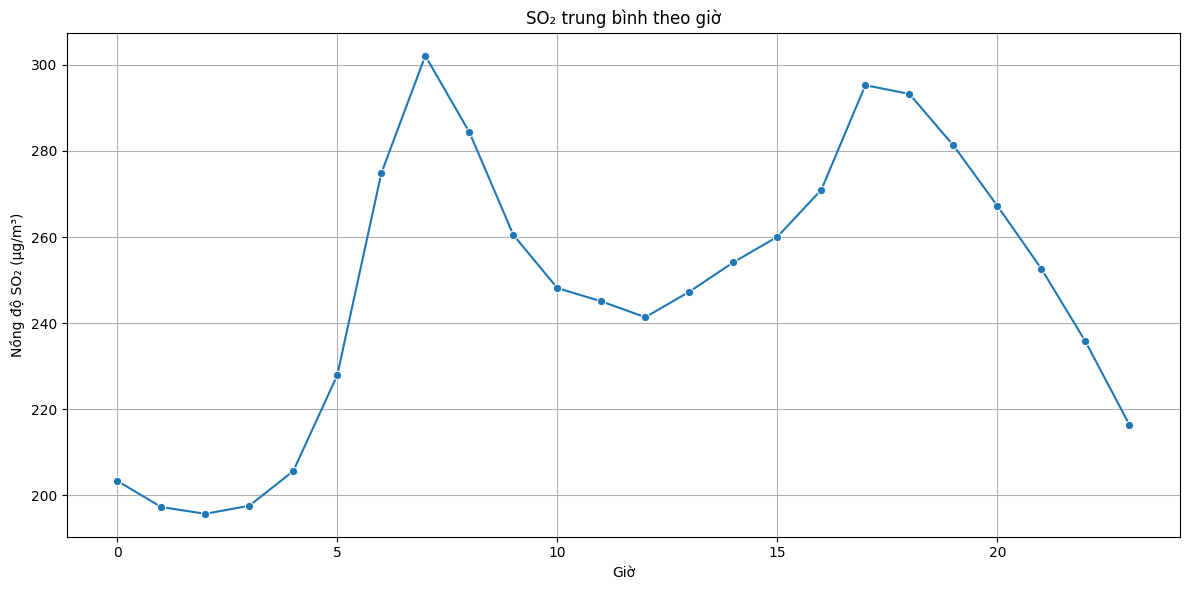

In [67]:
# Theo giờ trong ngày (của cả 2 năm)
so2_by_hour = df.groupby(['hour'])['SO2'].mean().reset_index()
so2_by_hour = so2_by_hour.sort_values(by='SO2', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=so2_by_hour, x='hour', y='SO2', marker='o')
plt.title('SO₂ trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Nồng độ SO₂ (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
print (so2_by_hour)

    hour         SO2
7      7  302.121217
17    17  295.280490
18    18  293.245289
8      8  284.390071
19    19  281.288751
6      6  274.806299
16    16  270.989646
20    20  267.258363
9      9  260.503338
15    15  260.052056
14    14  254.125286
21    21  252.633612
10    10  248.155985
13    13  247.296337
11    11  245.058286
12    12  241.370643
22    22  235.752914
5      5  227.909974
23    23  216.400030
4      4  205.632751
0      0  203.350119
3      3  197.580273
1      1  197.280106
2      2  195.703497


#### 📈 SO2 theo giờ trong ngày (Gộp dữ liệu 2 năm)
- **Dạng biểu đồ**: lineplot
- **Trục X**: Các giờ trong ngày
- **Trục Y**: Nồng độ trung bình SO2 (µg/m³)
- **Mục tiêu**: Phân tích nồng độ SO₂ trung bình theo từng giờ trong ngày nhằm nhận diện các khung giờ có nguy cơ ô nhiễm cao, hỗ trợ cảnh báo sớm và điều chỉnh hoạt động sản xuất – giao thông.
- **Nhận xét**: 
    - Giờ cao điểm SO₂ cao nhất: 
        - 07:00 sáng có giá trị trung bình cao nhất: ~302.12 µg/m³
    - Tiếp theo là:
        - 17:00 (~295.28 µg/m³)
        - 18:00 (~293.25 µg/m³)
        - 08:00 (~284.39 µg/m³)
    - Khung giờ SO₂ thấp nhất: Giữa đêm và rạng sáng: 0h – 4h với mức thấp hơn 205 µg/m³ → Thấp nhất là 02:00 với ~195.70 µg/m³
- **Xu hướng**:
    - Buổi sáng (6h–9h): SO₂ tăng mạnh do lượng xe cộ và hoạt động đô thị bắt đầu tăng nhanh (giờ cao điểm).
    - Buổi chiều (16h–19h): Một đỉnh khác được ghi nhận, trùng với giờ tan tầm.
    - Đêm và rạng sáng: Hoạt động kinh tế thấp, ít khí thải → nồng độ SO₂ giảm rõ rệt.
- **Khuyến nghị**:
    - Các khung giờ 7h và 17–18h nên được xem là giờ cảnh báo cao với SO₂.
    - Cần tăng cường kiểm soát khí thải từ phương tiện, nhà máy trong các giờ cao điểm này.

### NO₂ (Nitrogen Dioxide)

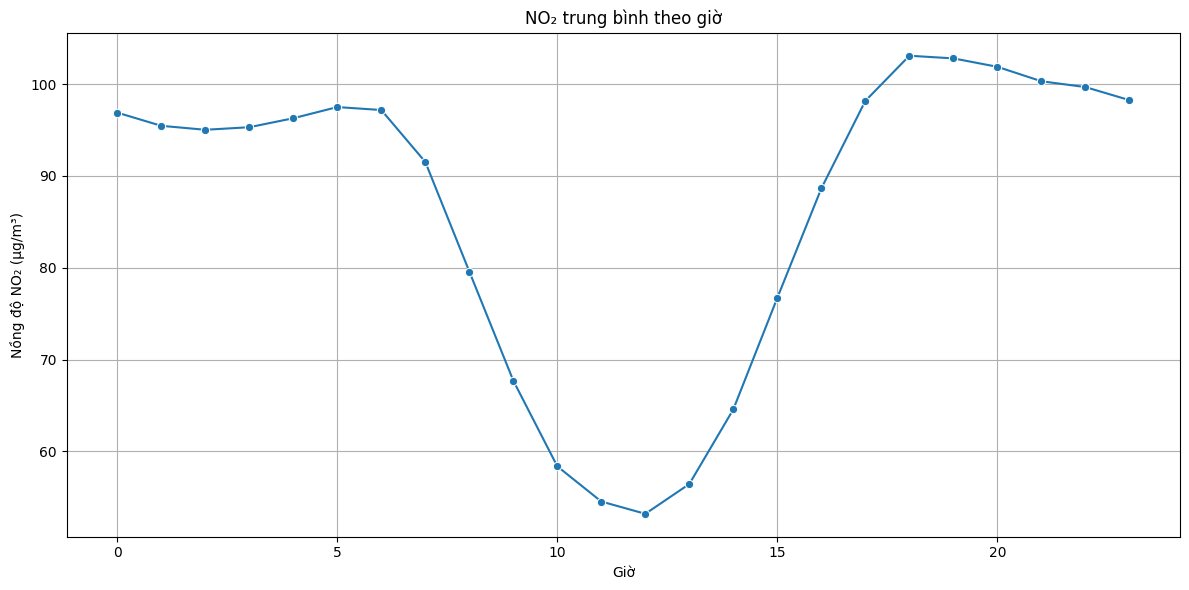

In [69]:
# Theo giờ trong ngày (của cả 2 năm)
no2_by_hour = df.groupby(['hour'])['NO2'].mean().reset_index()
no2_by_hour = no2_by_hour.sort_values(by='NO2', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=no2_by_hour, x='hour', y='NO2', marker='o')
plt.title('NO₂ trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Nồng độ NO₂ (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
print(no2_by_hour)

    hour         NO2
18    18  103.083521
19    19  102.794749
20    20  101.878126
21    21  100.304352
22    22   99.670117
23    23   98.249402
17    17   98.168287
5      5   97.492951
6      6   97.171747
0      0   96.888259
4      4   96.275319
1      1   95.451887
3      3   95.298529
2      2   95.019619
7      7   91.519080
16    16   88.637879
8      8   79.584911
15    15   76.725224
9      9   67.697139
14    14   64.575236
10    10   58.365325
13    13   56.440897
11    11   54.533555
12    12   53.194946


#### 📈 NO2 theo giờ trong ngày (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: lineplot
- **Trục X**: Các giờ trong ngày
- **Trục Y**: Nồng độ trung bình NO2 (µg/m³)
- **Mục tiêu**: Phân tích nồng độ NO₂ trung bình theo từng giờ trong ngày nhằm nhận diện các khung giờ có nguy cơ ô nhiễm cao, hỗ trợ cảnh báo sớm và điều chỉnh hoạt động sản xuất – giao thông.
- **Nhận xét xu hướng**: 
    - NO₂ đạt đỉnh vào buổi tối, đặc biệt từ 17h đến 21h, với giá trị cao nhất vào lúc 18h (~103 µg/m³).
    - Buổi sáng sớm và ban đêm (0h–6h) cũng có giá trị tương đối cao (~95–97 µg/m³).
    - Buổi trưa và đầu giờ chiều (10h–14h) là khoảng thời gian NO₂ thấp nhất, dao động từ 53–64 µg/m³.
- **Giải thích**:
    - Các đỉnh cao vào giờ chiều – tối phản ánh hoạt động giao thông tan tầm (xe máy, ô tô) và mật độ dân cư cao.
    - NO₂ giảm vào giữa trưa có thể do ánh sáng mặt trời mạnh, giúp phá hủy NO₂ qua phản ứng quang hóa.
    - Nồng độ NO₂ tăng nhẹ lại vào sáng sớm và khuya khi nhiệt độ thấp, gió yếu khiến khí khó khuếch tán.

          SO2       NO2
SO2  1.000000 -0.529119
NO2 -0.529119  1.000000


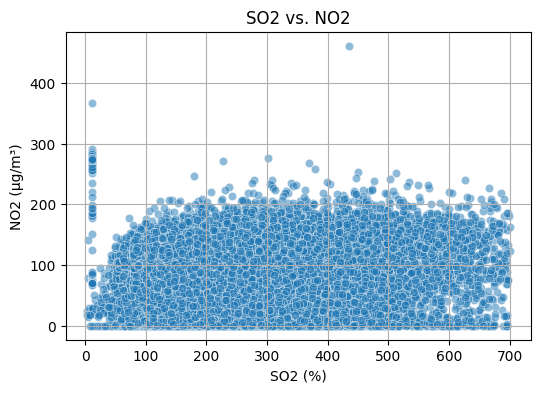

In [71]:
# Kiểm tra tương quan giữa SO2 và NO2
correlation = df[['SO2', 'NO2']].corr()
print(correlation)


# Vẽ biểu đồ scatter để trực quan hóa
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='SO2', y='NO2', alpha=0.5)
plt.title('SO2 vs. NO2')
plt.xlabel('SO2 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()

#### 🔗 Mối tương quan giữa SO2 và NO2

- **Dạng biểu đồ**: Scatterplot
- **Trục X**: SO2 (µg/m³)
- **Trục Y**: NO2 (µg/m³)
- **Mục tiêu**: Kiểm tra độ tương quan giữa SO2 và NO2
- **Nhận xét**: 
    - Hệ số tương quan Pearson ~ -0.529 → SO₂ và NO₂ có mối tương quan nghịch vừa phải.
    - Nghĩa là: Khi nồng độ SO₂ tăng, NO₂ có xu hướng giảm, và ngược lại.
- **Giải thích**:
    - Nguồn phát thải khác nhau:
        - SO₂ chủ yếu sinh ra từ đốt than đá, dầu diesel, và các quá trình công nghiệp như sản xuất xi măng, luyện kim.
        - NO₂ lại thường phát sinh từ đốt nhiên liệu động cơ (giao thông), các nhà máy điện, và thiết bị đốt khí gas.
        - Tùy theo thời gian và khu vực, hoạt động của các nguồn này có thể khác biệt, dẫn đến xu hướng "bù trừ" trong dữ liệu.
    - Tác động thời tiết:
        - Điều kiện khí tượng như gió, độ ẩm, mưa, nhiệt độ có thể làm loãng, tích tụ hoặc phản ứng hóa học khác nhau giữa 2 loại khí.
        - Ví dụ: Trong môi trường ẩm, SO₂ dễ bị hòa tan vào hơi nước → giảm nồng độ khí, trong khi NO₂ lại có thể tích tụ nhiều hơn ở những khu vực giao thông cao nhưng không mưa.
    - Phản ứng quang hóa học:
        - NO₂ có thể phản ứng dưới ánh sáng mặt trời để tạo thành O₃ (ozone mặt đất) → làm giảm lượng NO₂ vào ban ngày.
        - Trong khi đó, SO₂ ít bị ảnh hưởng bởi ánh sáng mặt trời, nên biến động theo cách riêng.

### CO (Carbon Monoxide)

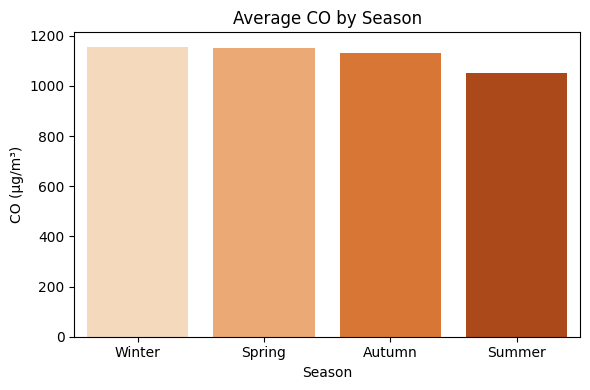

In [77]:
# Theo mùa (gộp 2 năm)
co_by_season = df.groupby('season')['CO'].mean().reset_index()
co_by_season = co_by_season.sort_values(by='CO', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
sns.barplot(data=co_by_season, x='season', y='CO', palette='Oranges')
plt.title('Average CO by Season')
plt.ylabel('CO (µg/m³)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

#### 📈 CO theo mùa (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: barplot
- **Trục X**: 4 mùa (Winter, Autumn, Spring, Summer)
- **Trục Y**: Trung bình CO (µg/m³)
- **Mục tiêu**: Phân tích xu hướng ô nhiễm CO theo mùa.

| Mùa     | Nồng độ CO trung bình (µg/m³) |
|---------|-------------------------------|
| Winter  | 1,156.10                      |
| Spring  | 1,153.27                      |
| Autumn  | 1,130.39                      |
| Summer  | 1,051.22                      |

- **Nhận xét**: 
    - Nồng độ CO cao nhất vào mùa Đông (1,156) và thấp nhất vào mùa Hè (1,051).
    - Có sự chênh lệch không đáng kể giữa các mùa
    - Mức ô nhiễm có xu hướng tăng vào mùa khô (Đông) và giảm vào mùa mưa (Hè).
- **Giải thích**:
    - Mùa đông không khí lạnh, ít khuếch tán, khí CO dễ tích tụ và tần suất sử dụng phương tiện cá nhân, máy sưởi, nấu nướng tăng cao → lượng khí CO phát thải cũng tăng.
    - Mùa hè nắng nóng và đối lưu không khí tốt hơn, giúp phân tán CO nhanh hơn và người dân có xu hướng sử dụng ít nhiên liệu đốt, nên phát thải CO thấp hơn.

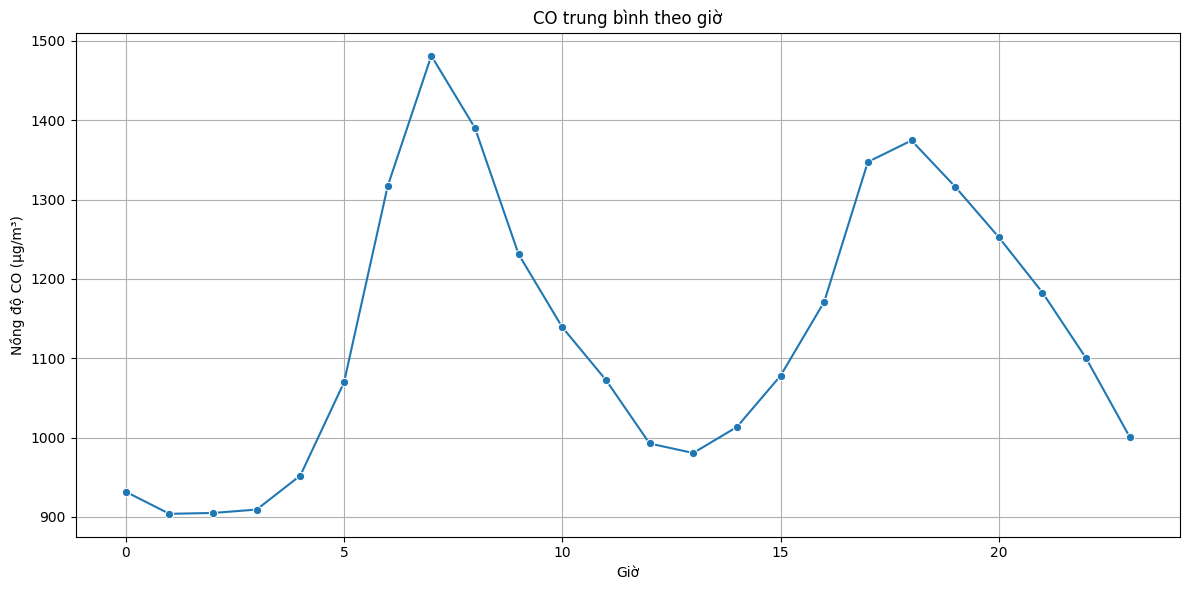

In [79]:
# Theo giờ trong ngày (của cả 2 năm)
co_by_hour = df.groupby(['hour'])['CO'].mean().reset_index()
co_by_hour = co_by_hour.sort_values(by='CO', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=co_by_hour, x='hour', y='CO', marker='o')
plt.title('CO trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Nồng độ CO (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
print (co_by_hour)

    hour           CO
7      7  1481.413669
8      8  1390.323421
18    18  1374.557344
17    17  1347.537863
6      6  1316.910534
19    19  1316.268786
20    20  1252.514125
9      9  1231.058678
21    21  1182.800015
16    16  1171.148441
10    10  1139.092752
22    22  1099.913656
15    15  1077.970876
11    11  1072.598908
5      5  1069.521357
14    14  1013.337374
23    23  1000.462766
12    12   992.510420
13    13   980.518008
4      4   952.137329
0      0   931.698754
3      3   909.229896
2      2   904.911560
1      1   903.842299


#### 📈 CO theo giờ trong ngày (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: lineplot
- **Trục X**: Các giờ trong ngày
- **Trục Y**: Nồng độ trung bình CO (µg/m³)
- **Mục tiêu**: Phân tích nồng độ CO trung bình theo từng giờ trong ngày để nhận diện xu hướng, hỗ trợ dự báo và đề xuất giải pháp kiểm soát ô nhiễm.
- **Nhận xét xu hướng**: 
    - Cao nhất vào buổi sáng (7h–9h):
        - Mức CO đạt đỉnh lúc 7 giờ với giá trị 1,481 µg/m³, sau đó giảm dần từ 8h đến 10h.
        - Đây là khoảng giờ cao điểm giao thông buổi sáng, nhiều xe cộ hoạt động → phát thải khí CO tăng mạnh.
    - Đỉnh thứ hai vào chiều tối (17h–20h):
        - Bắt đầu tăng trở lại từ 16h, đạt mức cao thứ hai lúc 18h (1,374 µg/m³), tương ứng với giờ tan tầm.
        - Hiện tượng tương tự như buổi sáng: giao thông đông đúc → khí CO tăng.
    - Giảm dần từ 21h đến 4h sáng:
        - Sau 20h, CO giảm rõ rệt, thấp nhất vào khoảng 1–3h sáng (~900 µg/m³).
        - Giai đoạn này giao thông ít, hoạt động công nghiệp, dân sinh giảm mạnh.
    - Bắt đầu tăng từ 5h sáng: Từ 5h–6h, CO bắt đầu tăng trở lại, chuẩn bị cho đỉnh buổi sáng.

### TSP (Total Suspended Particles)

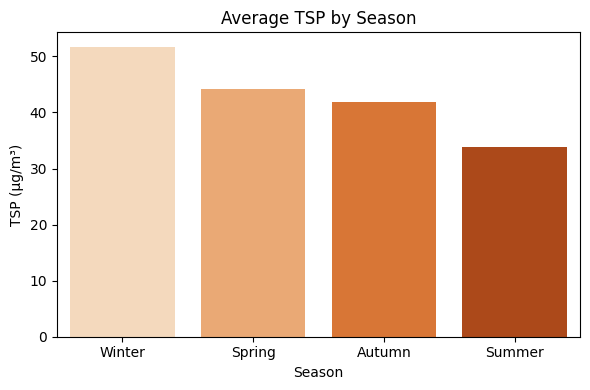

In [81]:
# Theo mùa (gộp 2 năm)
tsp_by_season = df.groupby('season')['TSP'].mean().reset_index()
tsp_by_season = tsp_by_season.sort_values(by='TSP', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
sns.barplot(data=tsp_by_season, x='season', y='TSP', palette='Oranges')
plt.title('Average TSP by Season')
plt.ylabel('TSP (µg/m³)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

#### 📈 TSP theo mùa (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: barplot
- **Trục X**: 4 mùa (Winter, Autumn, Spring, Summer)
- **Trục Y**: Trung bình TSP (µg/m³)
- **Mục tiêu**: 
    . Phân tích xu hướng ô nhiễm TSP theo mùa.
    
| Mùa              | Nồng độ TSP trung bình (µg/m³) |
| ---------------- | ------------------------------ |
| ❄️ Winter (Đông) | **51.70**                      |
| 🌸 Spring (Xuân) | **44.18**                      |
| 🍁 Autumn (Thu)  | **41.87**                      |
| ☀️ Summer (Hạ)   | **33.86**                      |

- **Nhận xét**: 
    - Mùa Đông có nồng độ TSP cao nhất (~51.7 µg/m³), cho thấy nguy cơ ô nhiễm bụi tổng cao hơn rõ rệt.
    - Mùa Hạ có mức TSP thấp nhất, chỉ khoảng ~33.9 µg/m³.
    - TSP có xu hướng giảm dần từ Đông → Xuân → Thu → Hạ.
- **Giải thích**:
    - Vào mùa Đông, nhiệt độ thấp, gió yếu, không khí ổn định làm bụi dễ tích tụ gần mặt đất, khó phát tán.
    - Mùa Hạ có gió mạnh hơn, mưa nhiều, giúp khuếch tán và rửa trôi bụi trong không khí.
    - Các hoạt động đốt, giao thông trong mùa lạnh có thể góp phần tăng lượng bụi.

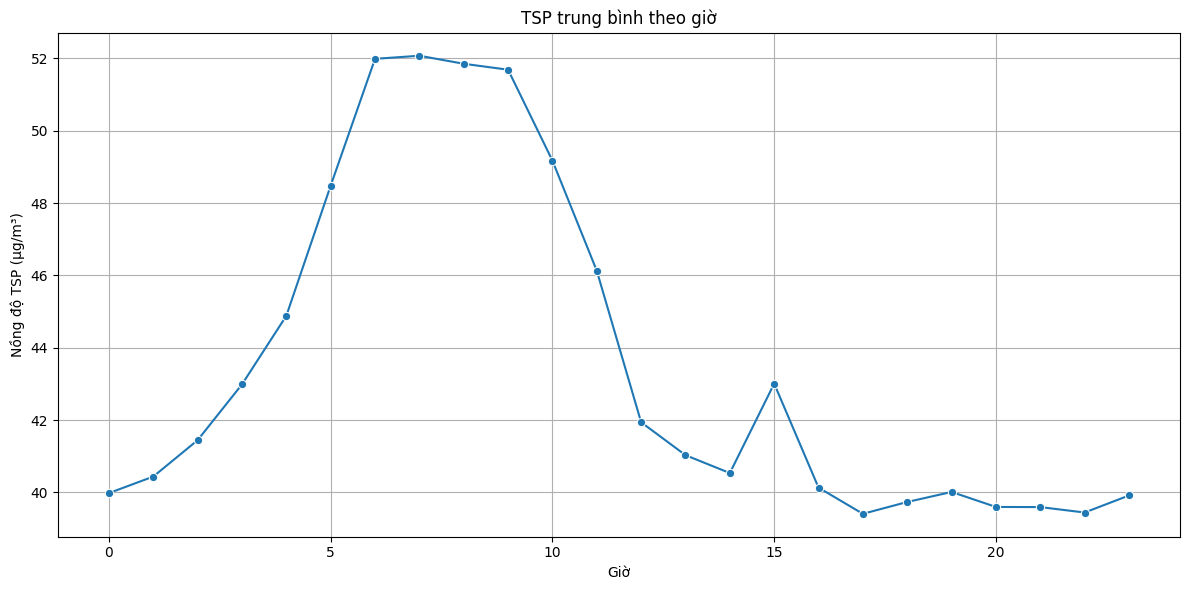

In [83]:
# Theo giờ trong ngày (của cả 2 năm)
tsp_by_hour = df.groupby(['hour'])['TSP'].mean().reset_index()
tsp_by_hour = tsp_by_hour.sort_values(by='TSP', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=tsp_by_hour, x='hour', y='TSP', marker='o')
plt.title('TSP trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Nồng độ TSP (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
print (tsp_by_hour)

    hour        TSP
7      7  52.071236
6      6  51.985596
8      8  51.849180
9      9  51.685221
10    10  49.171812
5      5  48.479340
11    11  46.129267
4      4  44.881478
15    15  43.008105
3      3  42.986431
12    12  41.940822
2      2  41.444848
13    13  41.031352
14    14  40.536558
1      1  40.438791
16    16  40.133760
19    19  40.014391
0      0  39.982404
23    23  39.916853
18    18  39.736909
20    20  39.599812
21    21  39.595617
22    22  39.445828
17    17  39.409819


#### 📈 TSP theo giờ trong ngày (Gộp dữ liệu 2 năm)

- **Dạng biểu đồ**: lineplot
- **Trục X**: Các giờ trong ngày
- **Trục Y**: Nồng độ trung bình TSP (µg/m³)
- **Mục tiêu**: Phân tích nồng độ TSP trung bình theo từng giờ trong ngày để nhận diện xu hướng, hỗ trợ dự báo và đề xuất giải pháp kiểm soát ô nhiễm.
- **Nhận xét xu hướng**: 
    - Đỉnh cao TSP xuất hiện vào buổi sáng (6h–9h) với nồng độ trên 51 µg/m³, cao nhất là lúc 7h sáng.
    - TSP bắt đầu giảm dần từ sau 10h sáng đến chiều và thấp nhất vào cuối ngày (17h–22h).
    - Ban đêm và rạng sáng (0h–5h) cũng có giá trị thấp, dao động quanh mức 39–44 µg/m³.
- **Giải thích**:
    - Buổi sáng là thời điểm hoạt động giao thông, sinh hoạt bắt đầu gia tăng, làm phát sinh bụi mịn và bụi tổng.
    - Sau 10h, nhờ vào tăng nhiệt độ, gió, ánh nắng, bụi có thể bị phân tán tốt hơn.
    - Chiều – tối và ban đêm, lưu lượng giao thông giảm, hoạt động sản xuất ít hơn, giúp duy trì mức TSP thấp.

            TSP     PM2.5
TSP    1.000000  0.660889
PM2.5  0.660889  1.000000


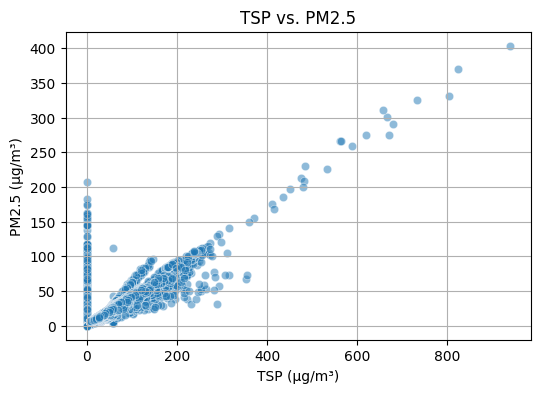

In [85]:
# Kiểm tra tương quan giữa TSP và PM2.5
correlation = df[['TSP', 'PM2.5']].corr()
print(correlation)


# Vẽ biểu đồ scatter để trực quan hóa
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TSP', y='PM2.5', alpha=0.5)
plt.title('TSP vs. PM2.5')
plt.xlabel('TSP (µg/m³)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

#### 🔗 Mối tương quan giữa TSP và PM2.5

- **Dạng biểu đồ**: Scatterplot
- **Trục X**: TSP (µg/m³)
- **Trục Y**: PM2.5 (µg/m³)
- **Mục tiêu**: Kiểm tra độ tương quan giữa TSP và PM2.5
- **Nhận xét**: 
    - Hệ số tương quan Pearson = 0.661 ⇒ tương quan thuận mạnh giữa TSP (Tổng bụi lơ lửng) và PM2.5 (bụi mịn có đường kính ≤ 2.5µm).
    - Nghĩa là: 
        - Khi TSP tăng, thì PM2.5 cũng có xu hướng tăng theo.
        - Tuy nhiên, không phải toàn bộ TSP là PM2.5 nên vẫn có sự dao động độc lập giữa các chỉ số.
    - Mối quan hệ này hợp lý về mặt vật lý, vì PM2.5 là thành phần cấu thành TSP — thường đến từ khí thải công nghiệp, xe cộ, đốt rác, xây dựng...

### Temperature (Nhiệt độ)

<Axes: >

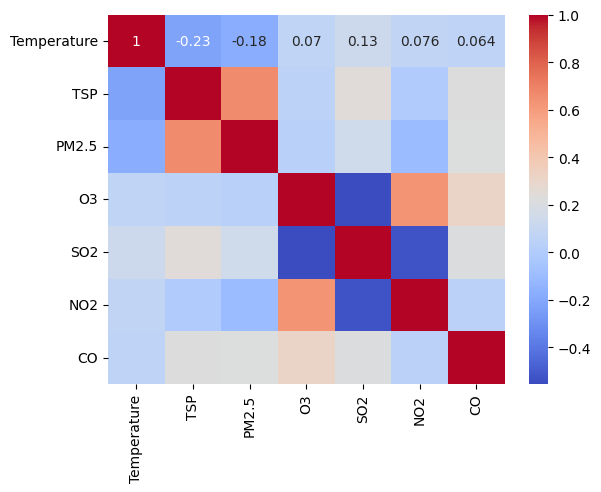

In [87]:
### Phân tích tương quan giữa Temperature và các chất ô nhiễm

sns.heatmap(df[['Temperature', 'TSP', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO']].corr(), annot=True, cmap='coolwarm')


#### 🔥 Tương quan giữa Nhiệt độ và các chỉ số ô nhiễm không khí
- **Dạng biểu đồ**: Heatmap thể hiện hệ số tương quan Pearson giữa các biến
- **Diễn giải biểu đồ**:

| Biến so sánh   | Tương quan với Nhiệt độ | Nhận xét chính                                                   |
| -------------- | ----------------------- | ---------------------------------------------------------------- |
| **TSP**        | -0.23                   | Tương quan âm yếu → Nhiệt độ tăng thì TSP có xu hướng giảm nhẹ   |
| **PM2.5**      | -0.18                   | Tương quan âm rất yếu → Nhiệt độ ít ảnh hưởng đến PM2.5          |
| **O3 (ozone)** | +0.07                   | Tương quan dương yếu, gần như không đáng kể                      |
| **SO2**        | +0.13                   | Tương quan dương yếu → SO2 có thể hơi tăng nhẹ khi nhiệt độ tăng |
| **NO2**        | +0.076                  | Tương quan dương rất yếu                                         |
| **CO**         | +0.064                  | Gần như không có tương quan                                      |

- **Tổng kết**:
    - Biểu đồ cho thấy nhiệt độ không có mối liên hệ mạnh với các chỉ số ô nhiễm.
    - TSP và PM2.5 là hai chỉ số có tương quan âm rõ nhất, cho thấy xu hướng giảm nhẹ khi trời nóng hơn.
    - Các chất khí như SO2, NO2, CO, O3 có tương quan rất yếu hoặc không đáng kể với nhiệt độ trong dữ liệu này.
    - Điều này có thể do ảnh hưởng của các yếu tố khác như: lượng mưa, tốc độ gió, độ ẩm, hoặc hoạt động giao thông – công nghiệp không thay đổi theo nhiệt độ.

### Humidity (Độ ẩm):

<Axes: >

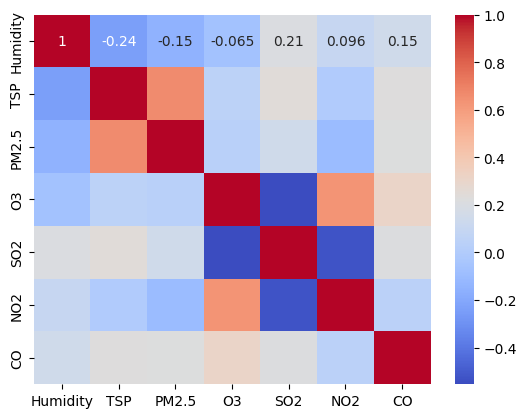

In [88]:
### Phân tích tương quan giữa Humidity và các chất ô nhiễm

sns.heatmap(df[['Humidity', 'TSP', 'PM2.5', 'O3', 'SO2', 'NO2', 'CO']].corr(), annot=True, cmap='coolwarm')

#### 🔥 Tương quan giữa Độ ẩm và các chỉ số ô nhiễm không khí
- **Dạng biểu đồ**: Heatmap thể hiện hệ số tương quan Pearson giữa các biến
- **Diễn giải biểu đồ**:

| Biến so sánh   | Tương quan với Humidity | Nhận xét chính                                           |
| -------------- | ----------------------- | -------------------------------------------------------- |
| **TSP**        | -0.24                   | Tương quan âm yếu → Độ ẩm tăng, TSP có xu hướng giảm nhẹ |
| **PM2.5**      | -0.15                   | Tương quan âm rất yếu                                    |
| **O3 (ozone)** | -0.065                  | Không đáng kể, gần như không có tương quan               |
| **SO2**        | +0.21                   | Tương quan dương yếu → Có thể hơi tăng khi độ ẩm cao     |
| **NO2**        | +0.096                  | Rất yếu, gần như không ảnh hưởng                         |
| **CO**         | +0.15                   | Rất yếu, xu hướng tăng nhẹ khi độ ẩm tăng                |

- **Tổng kết**:
    - TSP và PM2.5 giảm nhẹ khi độ ẩm tăng – điều này hợp lý vì độ ẩm cao giúp bụi lắng xuống nhanh hơn
    - SO2 tăng nhẹ theo độ ẩm – có thể do phản ứng hóa học trong không khí ẩm làm tăng lượng khí SO2 hoặc giảm khả năng khuếch tán của nó.
    - Các chất khí khác (O3, NO2, CO) hầu như không bị ảnh hưởng đáng kể bởi độ ẩm theo dữ liệu này.

# Tính toán AQI theo chuẩn US EPA (Air Quality Index)

## Thông tin bảng quy đổi chuẩn US EPA cho các chất ô nhiễm

### PM2.5

| AQI      | PM2.5 (µg/m³) | Mức độ chất lượng không khí        |
| -------- | ------------- | ---------------------------------- |
| 0 – 50   | 0.0 – 12.0    | Tốt (Good)                         |
| 51 – 100 | 12.1 – 35.4   | Trung bình (Moderate)              |
| 101–150  | 35.5 – 55.4   | Nhạy cảm bị ảnh hưởng (USG)        |
| 151–200  | 55.5 – 150.4  | Không tốt (Unhealthy)              |
| 201–300  | 150.5 – 250.4 | Rất không tốt (Very Unhealthy)     |
| 301–400  | 250.5 – 350.4 | Nguy hại (Hazardous)               |
| 401–500  | 350.5 – 500.4 | Nguy hại nghiêm trọng (Hazardous+) |


### O3 (Ozone)

| AQI     | Nồng độ O₃ (µg/m³) |
| ------- | ------------------ |
| 0–50    | 0 – ~105.9        |
| 51–100  | ~107.8 – ~137.3  |
| 101–150 | ~139.2 – ~167.0  |
| 151–200 | ~168.9 – ~208.4  |
| 201–300 | ~210.3 – ~399.0  |
| 301–500 | ~401.0 – ~1211.4 |

### CO (Carbon Monoxide)

| AQI     | Nồng độ CO (µg/m³) |
| ------- | ------------------ |
| 0–50    | 0 – ~5044         |
| 51–100  | ~5160 – ~10790   |
| 101–150 | ~10906 – ~14255  |
| 151–200 | ~14372 – ~17721  |
| 201–300 | ~17838 – ~34983  |
| 301–400 | ~35100 – ~46432  |
| 401–500 | ~46549 – ~57900  |

### NO₂ (Nitrogen Dioxide)

| AQI     | Nồng độ NO₂ (µg/m³) |
| ------- | ------------------- |
| 0–50    | 0 – ~99.6          |
| 51–100  | ~101.5 – ~188.1   |
| 101–150 | ~190.0 – ~678.1   |
| 151–200 | ~680.0 – ~1222.1  |
| 201–300 | ~1224.0 – ~2349.1 |
| 301–400 | ~2351.0 – ~3093.2 |
| 401–500 | ~3095.1 – ~3837.3 |

### SO₂ (Sulfur Dioxide)

| AQI     | Nồng độ SO₂ (µg/m³) |
| ------- | ------------------- |
| 0–50    | 0 – ~91.6          |
| 51–100  | ~94.3 – ~190.8    |
| 101–150 | ~193.5 – ~471.5   |
| 151–200 | ~474.2 – ~777.2   |
| 201–300 | ~780.0 – ~1537.1  |
| 301–400 | ~1539.8 – ~2040.1 |
| 401–500 | ~2042.8 – ~2544.4 |

### TSP (Tổng bụi lơ lửng
- Không có bảng AQI chính thức của US EPA cho TSP. Thường tham khảo theo PM10 (nguồn từ Trung Quốc hoặc WHO)

| AQI     | Nồng độ TSP (µg/m³) |
| ------- | ------------------- |
| 0–50    | 0 – 50              |
| 51–100  | 51 – 150            |
| 101–150 | 151 – 250           |
| 151–200 | 251 – 350           |
| 201–300 | 351 – 420           |
| 301–500 | 421 – 500           |

## Tạo hàm tính AQI cho các chất gây ô nhiễm

In [102]:
# Tạo bảng breakpoint cho từng chất (US EPA)
breakpoints_dict = {
    'PM2.5': [
        (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 350.4, 301, 400),
    (350.5, 500.4, 401, 500)
    ],
    'TSP': [
        (0, 50, 0, 50),
    (51, 150, 51, 100),
    (151, 250, 101, 150),
    (251, 350, 151, 200),
    (351, 420, 201, 300),
    (421, 500, 301, 500),
    ],
    'NO2': [
        (0, 99.6, 0, 50),
    (101.5, 188.1, 51, 100),
    (190.0, 678.1, 101, 150),
    (680.0, 1222.1, 151, 200),
    (1224.0, 2349.1, 201, 300),
    (2351.0, 3093.2, 301, 400),
    (3095.1, 3837.3, 401, 500)
    ],
    'SO2': [
        (0, 91.6, 0, 50),
    (94.3, 190.8, 51, 100),
    (193.5, 471.5, 101, 150),
    (474.2, 777.2, 151, 200),
    (780.0, 1537.1, 201, 300),
    (1539.8, 2040.1, 301, 400),
    (2042.8, 2544.4, 401, 500)
    ],
    'CO': [
        (0, 5044, 0, 50),
    (5160, 10790, 51, 100),
    (10906, 14255, 101, 150),
    (14372, 17721, 151, 200),
    (17838, 34983, 201, 300),
    (35100, 46432, 301, 400),
    (46549, 57900, 401, 500)
    ],
    'O3': [
        (0, 105.9, 0, 50),
    (107.8, 137.3, 51, 100),
    (139.2, 167.0, 101, 150),
    (168.9, 208.4, 151, 200),
    (210.3, 399.0, 201, 300),
    (401.0, 1211.4, 301, 500)
    ]
}

In [103]:
# Tạo hàm tính AQI cho từng chất
def calculate_individual_aqi(concentration, breakpoints):
    for bp in breakpoints:
        Clow, Chigh, Ilow, Ihigh = bp
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return None  # Nếu vượt ngưỡng

# Tính AQI cho từng chất trong DataFrame
for pollutant in ['PM2.5', 'TSP', 'NO2', 'SO2', 'CO', 'O3']:
    df[f'{pollutant}_AQI'] = df[pollutant].apply(lambda x: calculate_individual_aqi(x, breakpoints_dict[pollutant]))

In [104]:
# Tìm chất ô nhiễm chính & AQI tổng (chính là AQI max của từng dòng)
aqi_columns = ['PM2.5_AQI', 'TSP_AQI', 'NO2_AQI', 'SO2_AQI', 'CO_AQI', 'O3_AQI']
df['AQI'] = df[aqi_columns].max(axis=1)
df['Main_Pollutant'] = df[aqi_columns].idxmax(axis=1).str.replace('_AQI', '')

### Gán nhãn mức độ ô nhiễm theo AQI

In [108]:
# Tạo hàm phân loại AQI thành mức độ
def classify_aqi_level(aqi):
    if aqi is None:
        return 'Unknown'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
    
# Gán nhãn cho các chất  
df['AQI_Level'] = df['AQI'].apply(classify_aqi_level)

# Trực quan hóa AQI theo không gian & thời gian

## AQI trung bình theo giờ trong ngày

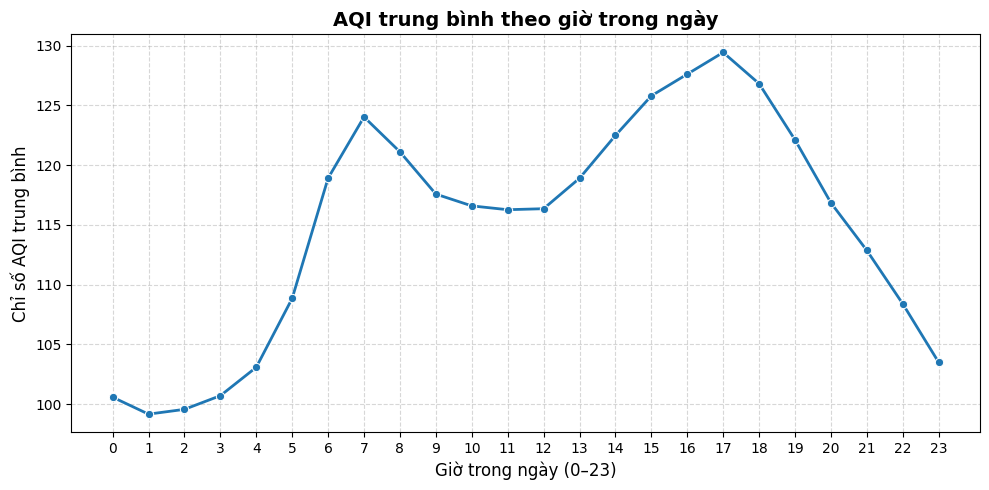

In [113]:
# Tính trung bình AQI theo từng giờ
hourly_aqi = df.groupby('hour')['AQI'].mean().reset_index()
hourly_aqi = hourly_aqi.sort_values(by='AQI', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_aqi, x='hour', y='AQI', marker='o', linewidth=2)

plt.title('AQI trung bình theo giờ trong ngày', fontsize=14, weight='bold')
plt.xlabel('Giờ trong ngày (0–23)', fontsize=12)
plt.ylabel('Chỉ số AQI trung bình', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [114]:
print(hourly_aqi)

    hour         AQI
17    17  129.439675
16    16  127.622431
18    18  126.823744
15    15  125.805681
7      7  124.037684
14    14  122.488278
19    19  122.119245
8      8  121.118512
6      6  118.914483
13    13  118.906673
9      9  117.581480
20    20  116.847364
10    10  116.594534
12    12  116.358041
11    11  116.274439
21    21  112.863489
5      5  108.851494
22    22  108.393671
23    23  103.496289
4      4  103.083678
3      3  100.705747
0      0  100.584730
2      2   99.563213
1      1   99.163134


### ⏰ AQI trung bình theo giờ trong ngày (2021–2022)

- **Dạng biểu đồ**: Lineplot
- **Trục X**: Giờ trong ngày (0–23)
- **Trục Y**: Giá trị trung bình chỉ số AQI
- **Mục tiêu**: Nhận diện thời điểm trong ngày có mức độ ô nhiễm không khí cao, phục vụ cảnh báo và điều chỉnh hoạt động sản xuất, giao thông.

#### 📌 Nhận xét xu hướng:
- AQI bắt đầu tăng từ 5h sáng, đạt đỉnh từ 16h đến 18h, cao nhất vào 17h (~129) – là khoảng thời gian ô nhiễm nghiêm trọng nhất.
- Giảm dần sau 19h, về mức thấp nhất vào 1h sáng (~99).
- Từ 10h đến 14h, AQI duy trì ổn định quanh mức ~116–122, có thể do hiệu ứng quang hóa làm giảm một số khí ô nhiễm.
- Buổi sáng từ 6h đến 9h cũng có chỉ số AQI cao, cho thấy ảnh hưởng từ hoạt động giao thông đầu ngày.
#### 🧭 Khuyến nghị:
- Hạn chế vận động ngoài trời vào giờ cao điểm ô nhiễm (16h–18h).
- Các cơ quan môi trường nên tăng cường cảnh báo vào khung giờ chiều – tối.

## AQI trung bình theo mùa trong năm

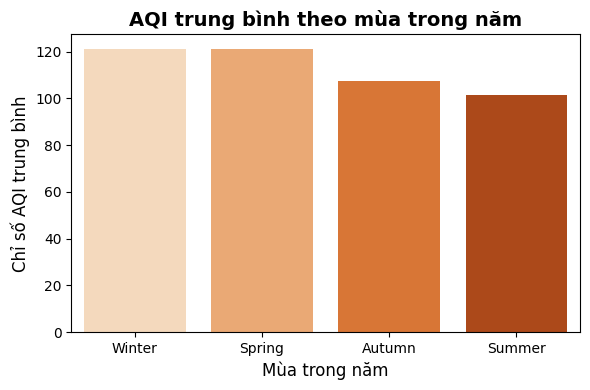

In [117]:
# Tính trung bình AQI theo từng giờ
season_aqi = df.groupby('season')['AQI'].mean().reset_index()
season_aqi = season_aqi.sort_values(by='AQI', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
sns.barplot(data=season_aqi, x='season', y='AQI', palette='Oranges')
plt.title('AQI trung bình theo mùa trong năm', fontsize=14, weight='bold')
plt.ylabel('Chỉ số AQI trung bình', fontsize=12)
plt.xlabel('Mùa trong năm', fontsize=12)
plt.tight_layout()
plt.show()

### 🌦️ AQI trung bình theo mùa (2021–2022)

- **Dạng biểu đồ**: Barplot
- **Trục X**: Mùa trong năm (Autumn, Winter, Spring, Summer)
- **Trục Y**: AQI trung bình
- **Mục tiêu**: Đánh giá sự biến động chất lượng không khí theo mùa để hỗ trợ hoạch định các chính sách môi trường và sức khỏe cộng đồng.

| Mùa       | AQI Trung Bình |
| --------- | -------------- |
| ❄️ Winter | 121.31         |
| 🌸 Spring | 121.29         |
| 🍂 Autumn | 107.25         |
| ☀️ Summer | 101.63         |

####  Nhận xét xu hướng:
- Winter và Spring là 2 mùa có mức ô nhiễm cao nhất, gần như tương đương (~121), cho thấy tình trạng ô nhiễm nghiêm trọng hơn vào mùa lạnh.
- Autumn có mức AQI thấp hơn rõ rệt (~107), có thể do thời tiết dịu mát, ít nghịch nhiệt.
- Summer là mùa có chất lượng không khí tốt nhất (~101), có thể do ánh sáng mặt trời mạnh, tăng cường quá trình phân hủy quang hóa các chất ô nhiễm.
#### 🧭 Khuyến nghị:
- Tăng cường giám sát, cảnh báo và kiểm soát nguồn phát thải vào mùa Đông và mùa Xuân.
- Các hoạt động ngoài trời nên được ưu tiên vào mùa Hè và mùa Thu để giảm tiếp xúc với ô nhiễm.

## AQI trung bình theo trạm quan trắc

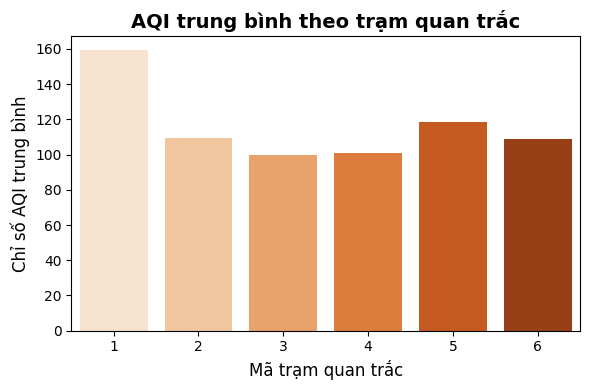

In [121]:
# Tính trung bình AQI theo trạm quan trắc
station_aqi = df.groupby('Station_No')['AQI'].mean().reset_index()
station_aqi = station_aqi.sort_values(by='AQI', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
sns.barplot(data=station_aqi, x='Station_No', y='AQI', palette='Oranges')
plt.title('AQI trung bình theo trạm quan trắc', fontsize=14, weight='bold')
plt.ylabel('Chỉ số AQI trung bình', fontsize=12)
plt.xlabel('Mã trạm quan trắc', fontsize=12)
plt.tight_layout()
plt.show()

### 🏭 AQI trung bình theo trạm quan trắc (2021–2022)

- **Dạng biểu đồ**: Barplot
- **Trục X**: Mã trạm quan trắc (Station_No)
- **Trục Y**: AQI trung bình
- **Mục tiêu**: So sánh mức độ ô nhiễm giữa các trạm để xác định khu vực có mức AQI cao nhất và cần ưu tiên giám sát.

| Station_No  | AQI Trung Bình |
| ---------   | -------------- |
| 1           | 159.13         |
| 5           | 118.74         |
| 2           | 109.18         |
| 6           | 108.98         |
| 4           | 101.08         |
| 3           | 99.83          |

####  Nhận xét xu hướng:
- Trạm số 1 có AQI trung bình cao nhất (~159.13), cho thấy khu vực này có chất lượng không khí kém nhất và cần ưu tiên kiểm soát ô nhiễm.
- Các trạm số 5 (118.74) và số 2 (109.18) cũng có mức AQI đáng chú ý, phản ánh mức độ ô nhiễm cao hơn mức trung bình.
- Trạm số 3 (99.83) và số 4 (101.08) có giá trị AQI thấp hơn, nhưng vẫn trong ngưỡng cần theo dõi.
- Trạm số 6 có AQI trung bình thấp nhất (108.98) trong số các trạm còn lại.
#### Kết luận: 
- Kết quả giúp xác định rõ khu vực bị ô nhiễm nghiêm trọng nhất để đề xuất giải pháp giảm phát thải, tăng cường kiểm tra chất lượng không khí hoặc cảnh báo người dân.

In [123]:
# Xuất file CSV không có index
df.to_csv("HCMC_AQI_Cleaned.csv", index=False)